### Required Packages

In [38]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

### Generate Our Data 

In [62]:
centers = [[1, 1], [-1, -1], [1, -1]]

X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.6,
                            random_state=0)

### Normalize Data

In [63]:
X = StandardScaler().fit_transform(X)

### DBSCAN

In [64]:
db = DBSCAN(eps=0.2, min_samples=10).fit(X)

In [65]:
k = len(set(db.labels_))
print("Number of Clusters: {} Cluster".format(k))

Number of Clusters: 7 Cluster


In [66]:
res = pd.DataFrame(db.labels_, columns=["Labels"])

In [67]:
res["Labels"].value_counts(sort=True, ascending=True)

 4      5
 5      7
 3     14
 0    154
 1    179
-1    194
 2    197
Name: Labels, dtype: int64

### Results

<b> Cluster One: 243 Point</b><br />
<b> Cluster Two: 244 Point</b> <br />
<b> Cluster Three: 245 Point</b> <br />
<b> Cluster Four(-1 = Noise): 18 Point</b>

In [69]:
plot_df = pd.DataFrame(X, columns=["feature_1", "feature_2"])
plot_df["Labels"] = db.labels_

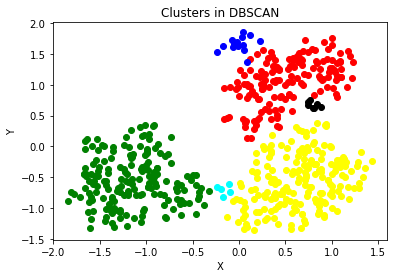

In [70]:
colors=["red", "green", "yellow", "blue", "cyan", "black"]
for i in range(k-1):
    data = plot_df[plot_df["Labels"]== i]
    plt.scatter(data["feature_1"], data["feature_2"], c=colors[i])

plt.title("Clusters in DBSCAN")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()